In [1]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install nltk


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

! python -m pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()



import tweepy
import numpy as np
import pandas as pd
import os
import re
import time
import pickle
import random as rnd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import nltk
import matplotlib.patheffects as peffects

from matplotlib import cm
from sklearn.model_selection import StratifiedKFold
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import explained_variance_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, plot_roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import time as timelib
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('fivethirtyeight')


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bharg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
colNames = ['target', 'id', 'date','flag','user','text']

In [4]:
originalDataDF = pd.read_csv('data/tweet_data.csv', names=colNames, delimiter=',' ,engine='python', nrows=None, encoding='latin-1', header=None)

In [5]:
originalDataDF.shape

(1600000, 6)

In [6]:
originalDataDF.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
def handling_emojis(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' EMO_POS ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', text)

    return text

In [8]:
# cleaning the text

# removing tagged username '@'
def cleaningText(text):
    text = text.strip('\'"?!,.():;') # removing punctuation
    text = re.sub(r'(.)\1+', r'\1\1', text) # convert more than 2 letter repetitions to 2 letter #fooood -> food
    text = re.sub(r'(-|\')','',text) # removing additional -& '
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removing @usernames
    text = re.sub(r'#','',text) #removing '#' symbols
    text = re.sub(r'RT[\s]+','',text) #removes RT(Re-Tweet) string
    text = re.sub(r'https?:\/\/\S+','',text) #removing the hyperlink
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', text) #removing urls
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Strip space, " and ' from tweet
    text = text.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    text = handling_emojis(text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    text = text.lower() #make the text to lowercase
    return text

In [9]:
originalDataDF['text'] = originalDataDF['text'].apply(cleaningText)
originalDataDF['text'][0]

'aww, thats a bummer. you shoulda got david carr of third day to do it. emo_pos '

In [10]:
contractionWords = {
"aren’t":"are not","can’t":"can not","couldn’t":"could not ","didn’t":"did not","doesn’t":"does not","don’t":"do not","hadn’t":"had not","hasn’t":"has not ","haven’t":"have not",
"I’m":"I am","I’ve":"I have","isn’t":"is not","let’s":"let us","mightn’t":"might not","mustn’t":"must not","shan’t":"shall not","shouldn’t":"should not","that’s":" that is","he’ll":" he will",
"I’ll":"I will","she’ll":"she will","she’s":"she is","there’s":"there is","they’ll":" they will","they’re":"they are","they’ve":"they have","we’re":"we are","we’ve":"we have","weren’t":"were not",
"what’ll":"what will","what’re":"what are","what’ve":"what have","where’s":"where is","who’d":"who would","who’ll":"who will","who’re":"who are","who’s":"who is","who’ve":"who have","won’t":"will not",
"wouldn’t":"would not","you’d":"you would","you’re":"you are","you’ve":"you have","it’s":"it is","wasn't":"was not"
}

In [11]:
# negation handling
def negationHandling(text):
    words = text.split()
    temp = [contractionWords[word] if word in contractionWords else word for word in words]
    temp = " ".join(temp)
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(negationHandling)

In [12]:
word_set = []
def wordTokenize(text):
    tokens = word_tokenize(text)
    return tokens
originalDataDF['text'] = originalDataDF['text'].apply(wordTokenize)
originalDataDF['text'][0]

['aww',
 ',',
 'thats',
 'a',
 'bummer',
 '.',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it',
 '.',
 'emo_pos']

In [13]:
stop_words = stopwords.words('english')
def removeStopWords(tokens):
    temp = [word for word in tokens if word not in stop_words]
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(removeStopWords)
originalDataDF['text'][0]

['aww',
 ',',
 'thats',
 'bummer',
 '.',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 '.',
 'emo_pos']

In [14]:
def removeUnnecessaryChars(tokens):
    temp = [word for word in tokens if word.isalpha()]
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(removeUnnecessaryChars)
originalDataDF['text'][0]

['aww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

In [15]:
lemma = WordNetLemmatizer()
def lemmatizeTweets(wordList):
    temp = []
    for word in wordList:
        _word = lemma.lemmatize(word)
        temp.append(_word)
    return ' '.join(temp)
originalDataDF['text'] = originalDataDF['text'].apply(lemmatizeTweets)

In [16]:
for i in originalDataDF['target']:
    if i == 4:
        print(i)
        break

4


In [17]:
#splitting the data into equal amounts of positive and negative words
def datasplitfortraining(l1=[],l2=[],m=0):
    k = 0
    print(m)
    for i in range(len(originalDataDF)):
        if(k==10000):
            break
        if originalDataDF['target'][i] == m:
            l1.append(originalDataDF['target'][i])
            l2.append(originalDataDF['text'][i])
            k+=1
    newmodifieddf = pd.DataFrame({'target':l1,'text':l2})
    return newmodifieddf



d1 = datasplitfortraining(m=4)
d2 = datasplitfortraining(m=2)
d3 = datasplitfortraining(m=0)

4
2
0


In [18]:
d3

,target,text
0,4,love u guy r best
1,4,im meeting one besties tonight cant wait girl ...
2,4,thanks twitter add sunisa got meet hin show dc...
3,4,sick really cheap hurt much eat real food plus...
4,4,effect everyone
...,...,...
19995,0,aww thats sad
19996,0,stupid dvd stuffing good bit jaw
19997,0,close friend family im afraid im work colleague
19998,0,crap looking last tweeted early shouldnt like


In [19]:
#Taking sample data for vectorization
requiredTweetData = d3

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

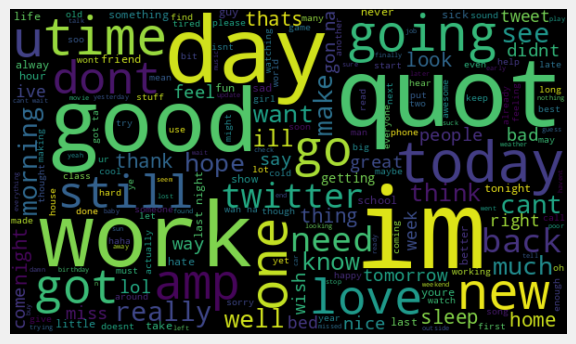

In [21]:
allwords = ''.join([t for t in d3['text']])
wordCloud = WordCloud(width=600,height=350,random_state=59,max_font_size=120).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [22]:
vectorizer = TfidfVectorizer(min_df = 5,max_df=0.8,sublinear_tf = True,use_idf = True)

In [23]:
train_vectors = vectorizer.fit_transform(d3['text'])

In [24]:
X = train_vectors.toarray()
y = np.where(d3['target'] == 0 , -1 , 1)

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [27]:
X_train.shape

(16000, 3277)

In [28]:
y_train.shape

(16000,)

In [29]:
time0 = timelib.time()

In [31]:
def find_label(labels_list):
    # Select the label which has highest occurance
    return max(set(labels_list), key=labels_list.count)

In [32]:
class KNN_Classifier():
    def __init__(self, k=2):
        self.k = k

    def euclidean_distance(self,data_point, dataset):
        # Calculate distance 
        distance = np.sum((data_point - dataset)**2, axis=1)
        # Return square root of distance
        return np.sqrt(distance)

    def fit(self, X_train, y_train):
        # Take a copy of training vectors
        self.X_vectors = X_train
        self.y_vectors = y_train

    def predict(self, x_test):
        nearest_neighbors = []
        for x in x_test:
            # Calculate the Euclidean distance from data point to all points in dataset 
            distances = self.euclidean_distance(x, self.X_vectors)
            
            # Combine the distance and corresponding label
            dist_labels = zip(distances, self.y_vectors)
            
            # Sort the distances
            sorted_neighbors_labels = [distance for _, distance in dist_labels]
            
            # Pick top k neighbors 
            nearest_neighbors.append(sorted_neighbors_labels[: self.k])

        # Return the most recurring label among nearest neighbors    
        return list(map(find_label, nearest_neighbors))

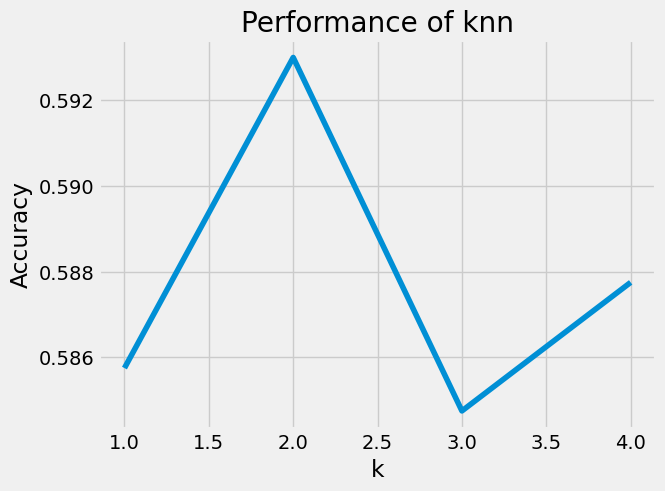

In [33]:
accuracies = []
ks = range(1, 5)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [34]:
accuracies

[0.58575, 0.593, 0.58475, 0.58775]

In [35]:
time1 = timelib.time()
duration = time1 - time0
print("Elapsed Time: %.2f min" % (duration / 60))

Elapsed Time: 82.08 min


In [36]:
knn = KNeighborsClassifier(k=2)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [37]:
accuracy_score(y_test,preds)

0.593

In [38]:
cfm = confusion_matrix(y_test,preds)

In [39]:
cfm

array([[1618,  382],
       [1246,  754]], dtype=int64)

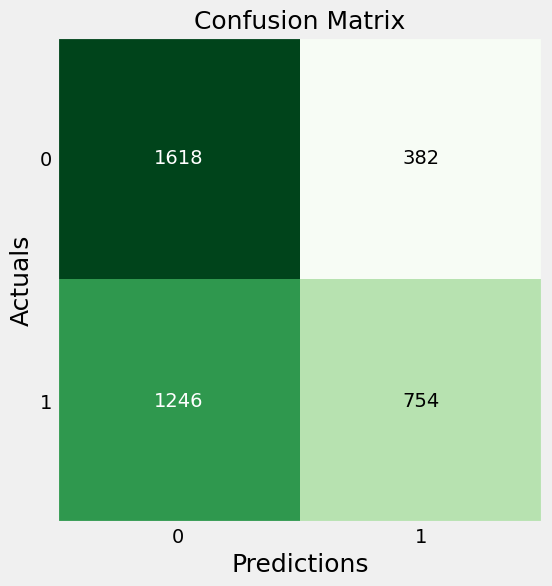

In [40]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cfm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [41]:
#calculating all the required metrics
FalsePositive = cfm.sum(axis=0) - np.diag(cfm)  
FalseNegative = cfm.sum(axis=1) - np.diag(cfm)
TruePositive = np.diag(cfm)
TrueNegative = cfm.sum() - (FalsePositive + FalseNegative + TruePositive)

FalsePositive = FalsePositive.astype(float)
FalseNegative = FalseNegative.astype(float)
TruePositive = TruePositive.astype(float)
TrueNegative = TrueNegative.astype(float)

In [42]:
#  Recall, or True positive rate
TPR = TruePositive/(TruePositive+FalseNegative)
print('Recall :',TPR)
# Specificity or True negative rate
TNR = TrueNegative/(TrueNegative+FalsePositive) 
print('Specificity :',TNR)
# Precision or Positive predictive value
PPV = TruePositive/(TruePositive+FalsePositive)
print('Precision :',PPV)
# Negative Predictive value
NPV = TrueNegative/(TrueNegative+FalseNegative)
# Fall out or false positive rate
FPR = FalsePositive/(FalsePositive+TrueNegative)
# False negative rate
FNR = FalseNegative/(TruePositive+FalseNegative)
# False discovery rate
FDR = FalsePositive/(TruePositive+FalsePositive)

Recall : [0.809 0.377]
Specificity : [0.377 0.809]
Precision : [0.56494413 0.66373239]


In [43]:
# Finding accuracy
accuracy = (TruePositive+TrueNegative)/(TruePositive+FalsePositive+FalseNegative+TrueNegative)
accuracy[0]

0.593

In [44]:
accuracy_score(y_test,preds)

0.593

In [45]:
precision_score(y_test,preds)

0.6637323943661971

In [46]:
recall_score(y_test,preds)

0.377

In [47]:
f1_score(y_test,preds)

0.4808673469387754

In [48]:
# knn = KNeighborsClassifier(k = 2)
# knn.fit(X_train, y_train)
# accuracy = knn.evaluate(X_test, y_test)
# accuracy

In [49]:
# knn = KNeighborsClassifier(k=7)
# knn.fit(X_train, y_train)


In [50]:
review = "SUPERB, I AM IN LOVE IN THIS PHONE"

In [51]:
review_vector = vectorizer.transform([review]) # vectorizing
print(knn.predict(review_vector.toarray()))

[-1]


In [52]:
review = "Do not purchase this product. My cell phone blast when I switched the charger"

In [53]:
review_vector = vectorizer.transform([review]) # vectorizing
print(knn.predict(review_vector.toarray()))

[-1]


In [54]:
strtfdKFold = StratifiedKFold(n_splits=3)

In [55]:
#splitting train 80 data into k folds
kfold = strtfdKFold.split(X_train, y_train)
scores = []


In [56]:
#performing kfold cross validation
for k, (train, test) in enumerate(kfold):
    knn.fit(X_train[train, :], y_train[train])
    preds = knn.predict(X_train[test, :])
    score = accuracy_score(y_train[test],preds)
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.575


Cross-Validation accuracy: 0.575 +/- 0.000
Fold:  2, Accuracy: 0.576


Cross-Validation accuracy: 0.575 +/- 0.001
Fold:  3, Accuracy: 0.574


Cross-Validation accuracy: 0.575 +/- 0.001


In [59]:
# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(knn, open('knn_model.sav', 'wb'))

In [ ]:
# from sklearn.neighbors import NearestNeighbors
#
# neigh = NearestNeighbors(n_neighbors=2)
# neigh.fit(X_train)
# preds = neigh.predict(X_test)